In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

In [2]:
df1=pd.read_csv('Pune_House_Data.csv')

In [3]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Alandi Road,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Ambegaon Budruk,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Anandnagar,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Aundh,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Aundh Road,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.shape

(13320, 9)

In [5]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df2=df1.drop(['area_type','society','balcony','availability'],axis='columns')

In [7]:
df2.shape

(13320, 5)

In [8]:
df2.head()

,location,size,total_sqft,bath,price
0,Alandi Road,2 BHK,1056,2.0,39.07
1,Ambegaon Budruk,4 Bedroom,2600,5.0,120.00
2,Anandnagar,3 BHK,1440,2.0,62.00
3,Aundh,3 BHK,1521,3.0,95.00
4,Aundh Road,2 BHK,1200,2.0,51.00


In [9]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
df3=df2.dropna()

In [11]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
df3['BHK']=df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\fulad\AppData\Local\Temp\ipykernel_996\1156995945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['BHK']=df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [14]:
df3.head()

,location,size,total_sqft,bath,price,BHK
0,Alandi Road,2 BHK,1056,2.0,39.07,2
1,Ambegaon Budruk,4 Bedroom,2600,5.0,120.00,4
2,Anandnagar,3 BHK,1440,2.0,62.00,3
3,Aundh,3 BHK,1521,3.0,95.00,3
4,Aundh Road,2 BHK,1200,2.0,51.00,2


In [15]:
df3['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [16]:
df3[df3.BHK>20]

,location,size,total_sqft,bath,price,BHK
1718,Uruli Devachi,27 BHK,8000,27.0,230.0,27
4684,Salunke Vihar,43 Bedroom,2400,40.0,660.0,43


In [17]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [18]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True


In [19]:
df3[df3['total_sqft'].apply(isfloat)]

,location,size,total_sqft,bath,price,BHK
0,Alandi Road,2 BHK,1056,2.0,39.07,2
1,Ambegaon Budruk,4 Bedroom,2600,5.0,120.00,4
2,Anandnagar,3 BHK,1440,2.0,62.00,3
3,Aundh,3 BHK,1521,3.0,95.00,3
4,Aundh Road,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Pashan,5 Bedroom,3453,4.0,231.00,5
13316,Paud Road,4 BHK,3600,5.0,400.00,4
13317,Pirangut,2 BHK,1141,2.0,60.00,2
13318,Prabhat Road,4 BHK,4689,4.0,488.00,4


In [20]:
df3[~df3['total_sqft'].apply(isfloat)].head(10)

,location,size,total_sqft,bath,price,BHK
30,Gultekdi,4 BHK,2100 - 2850,4.0,186.000,4
122,Ganeshkhind,4 BHK,3067 - 8156,4.0,477.000,4
137,Khadaki,2 BHK,1042 - 1105,2.0,54.005,2
165,Prabhat Road,2 BHK,1145 - 1340,2.0,43.490,2
188,Wakadewadi,2 BHK,1015 - 1540,2.0,56.800,2
410,Ganeshkhind,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Prabhat Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Raviwar Peth,9 Bedroom,4125Perch,9.0,265.000,9
661,Tilak Road,2 BHK,1120 - 1145,2.0,48.130,2
672,Alandi Road,4 Bedroom,3090 - 5002,4.0,445.000,4


In [21]:
def sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [22]:
sqft_to_num('1000-1250' )

1125.0

In [23]:
sqft_to_num('3067 - 8156')

5611.5

In [24]:
df4= df3.copy()

In [25]:
df4['total_sqft']=df4['total_sqft'].apply(sqft_to_num)

In [26]:
df4.head(10)

,location,size,total_sqft,bath,price,BHK
0,Alandi Road,2 BHK,1056.0,2.0,39.07,2
1,Ambegaon Budruk,4 Bedroom,2600.0,5.0,120.00,4
2,Anandnagar,3 BHK,1440.0,2.0,62.00,3
3,Aundh,3 BHK,1521.0,3.0,95.00,3
4,Aundh Road,2 BHK,1200.0,2.0,51.00,2
5,Balaji Nagar,2 BHK,1170.0,2.0,38.00,2
6,Baner,4 BHK,2732.0,4.0,204.00,4
7,Baner road,4 BHK,3300.0,4.0,600.00,4
8,Bhandarkar Road,3 BHK,1310.0,3.0,63.25,3
9,Bhavani Peth,6 Bedroom,1020.0,6.0,370.00,6


In [27]:
df4.loc[30]

location      Gultekdi
size             4 BHK
total_sqft      2475.0
bath               4.0
price            186.0
BHK                  4
Name: 30, dtype: object

In [28]:
df5=df4.copy()

In [29]:
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']

In [30]:
df5.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Alandi Road,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Ambegaon Budruk,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Anandnagar,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Aundh,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Aundh Road,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [31]:
len(df5['location'].unique())

97

In [32]:
df5['location']=df5['location'].apply(lambda x: x.strip())

In [33]:
location_stats= df5.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [34]:
df5.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Alandi Road,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Ambegaon Budruk,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Anandnagar,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Aundh,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Aundh Road,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [35]:
len(location_stats[location_stats<=10])

1

In [36]:
df5.head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Alandi Road,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Ambegaon Budruk,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Anandnagar,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Aundh,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Aundh Road,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Balaji Nagar,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Baner,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Baner road,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Bhandarkar Road,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Bhavani Peth,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [37]:
df5.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Alandi Road,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Ambegaon Budruk,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Anandnagar,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Aundh,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Aundh Road,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [38]:
df5.shape

(13246, 7)

In [39]:
df6= df5[~(df5.total_sqft/df5.BHK<300)]

In [40]:
df6.shape

(12502, 7)

In [41]:
df6['price_per_sqft'].describe()

count     12456.000000
mean       6308.628922
std        4168.075333
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [42]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m= np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [43]:
df6.shape

(12502, 7)

In [44]:
df7= remove_pps_outliers(df6)

In [45]:
df7.shape

(10883, 7)

In [46]:
def scatter_chart(df,location):
    BHK2=df[(df.location==location) & (df.BHK==2)]
    BHK3= df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(BHK2.total_sqft,BHK2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(BHK3.total_sqft,BHK3.price,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel('Total Sqaure Feet Area')
    plt.ylabel('Price Per Square Feet')
    plt.title(location)
    plt.legend()

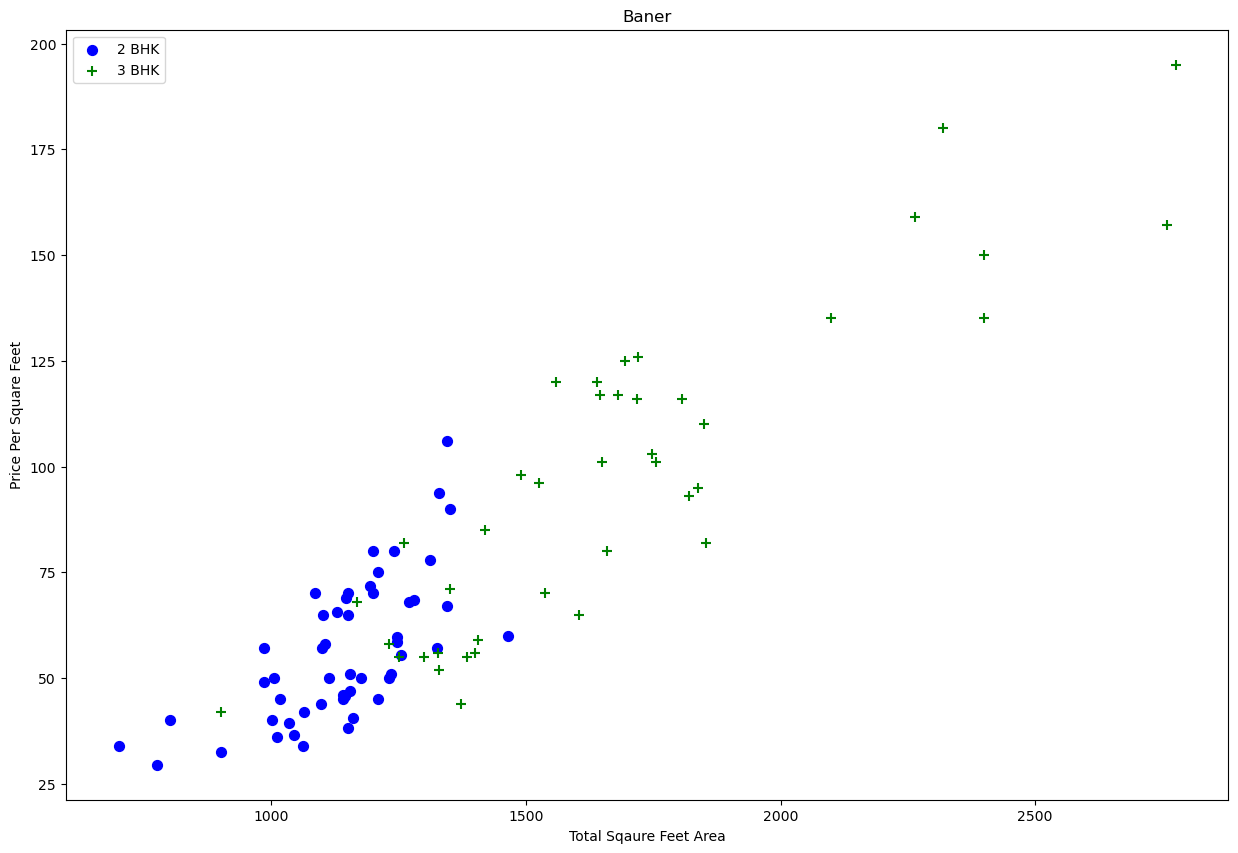

In [47]:
scatter_chart(df7,'Baner')

In [48]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats ={}
        for bhk,bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk]={
              'mean' : np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
            for bhk,bhk_df in location_df.groupby('BHK'):
                stats= bhk_stats.get(bhk-1)
                if stats and stats['count']>5:
                    exclude_indices= np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
                    return df.drop(exclude_indices,axis='index')

In [49]:
df8= remove_bhk_outliers(df7)

In [50]:
df8.shape

(10869, 7)

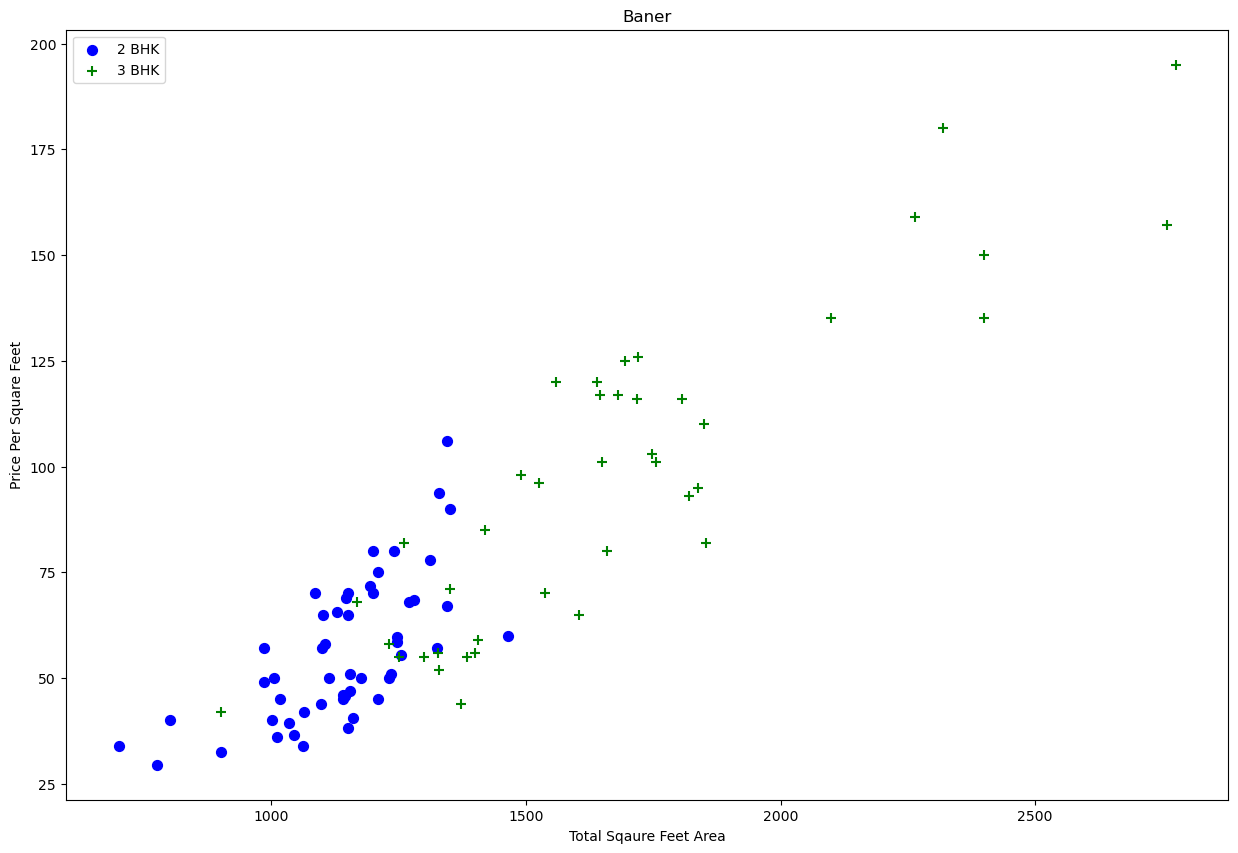

In [51]:
scatter_chart(df7,'Baner')

Text(0, 0.5, 'Count')

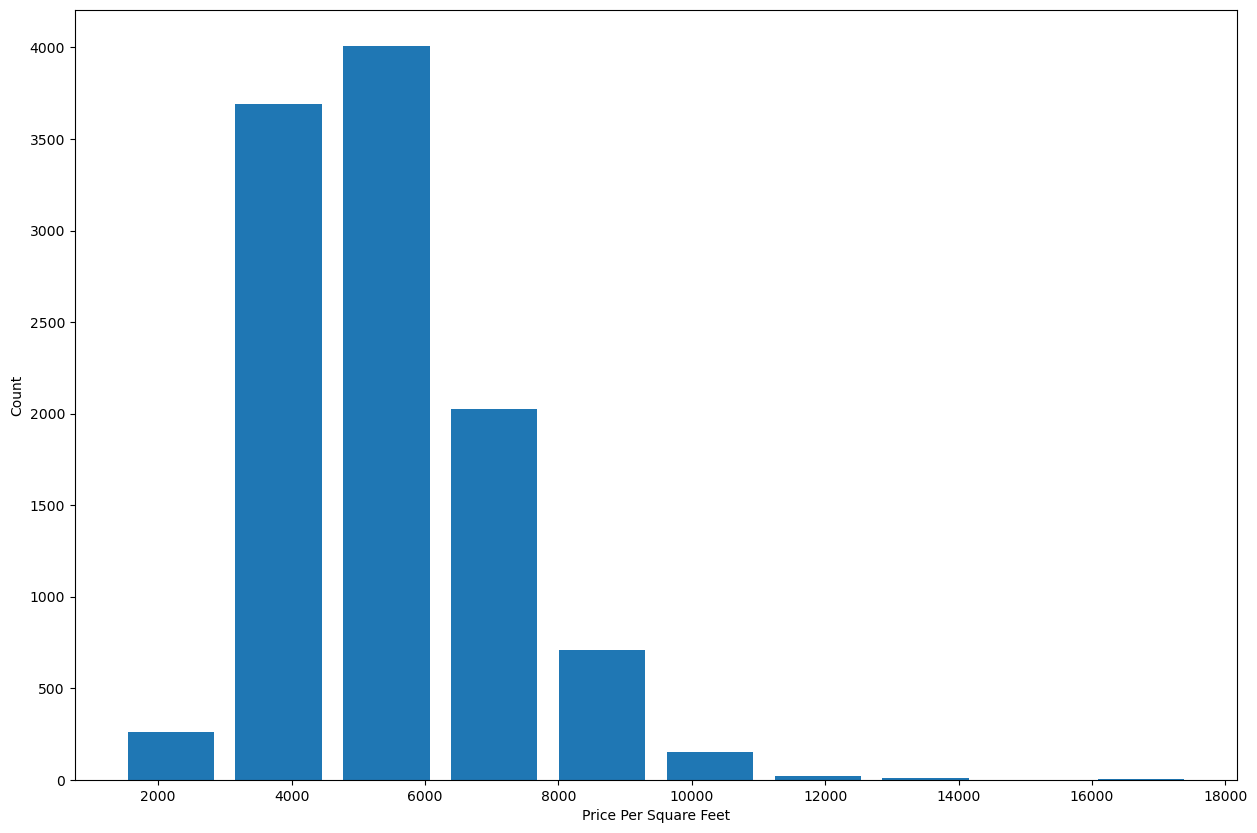

In [52]:
plt.hist(df8['price_per_sqft'],rwidth=0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

In [53]:
df8['bath'].unique()

array([ 2.,  4.,  3.,  5.,  9.,  1.,  6.,  7.,  8., 12., 13., 16.])

In [54]:
df8[df8['bath']>10]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1211,Bibvewadi,11 BHK,6000.0,12.0,150.0,11,2500.000000
2637,Fatima Nagar,10 BHK,12000.0,12.0,525.0,10,4375.000000
5265,Kondhwa Khurd,13 BHK,5425.0,13.0,275.0,13,5069.124424
6350,Model colony,16 BHK,10000.0,16.0,550.0,16,5500.000000
10389,Wagholi,10 BHK,4000.0,12.0,160.0,10,4000.000000


Text(0, 0.5, 'Count')

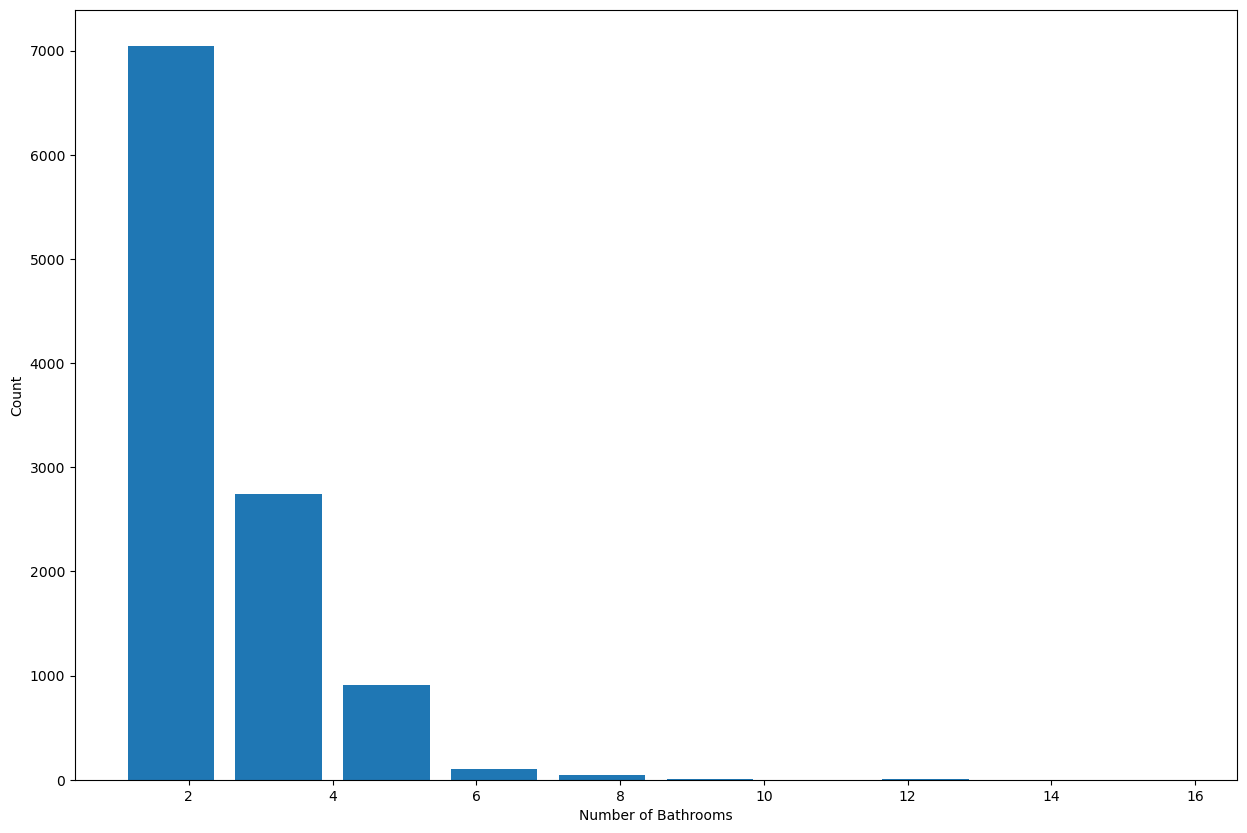

In [55]:
plt.hist(df8['bath'],rwidth=0.8)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')

In [56]:
df8[df8['bath']>df8['BHK']+2]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
772,Baner,3 BHK,1806.0,6.0,116.0,3,6423.034330
3067,Ghorpade Peth,6 BHK,11338.0,9.0,1000.0,6,8819.897689
4231,Karve Nagar,4 Bedroom,7000.0,8.0,450.0,4,6428.571429


In [57]:
df9=df8[df8['bath']<df8['BHK']+2]

In [58]:
df9.shape

(10786, 7)

In [59]:
df10=df9.drop(['size','price_per_sqft'],axis='columns')

In [60]:
df10.head()

,location,total_sqft,bath,price,BHK
0,Alandi Road,1056.0,2.0,39.07,2
1,Alandi Road,2894.0,4.0,245.00,4
2,Alandi Road,1084.0,2.0,50.00,2
3,Alandi Road,1230.0,2.0,80.00,2
4,Alandi Road,1750.0,3.0,130.00,3


In [61]:
dummies= pd.get_dummies(df10['location'],dtype='int')

In [62]:
dummies.head(3)

,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,Baner road,Bhandarkar Road,Bhavani Peth,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
df11= pd.concat([df10,dummies],axis='columns')

In [64]:
df11.head()

,location,total_sqft,bath,price,BHK,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,Alandi Road,1056.0,2.0,39.07,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Alandi Road,2894.0,4.0,245.00,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Alandi Road,1084.0,2.0,50.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Alandi Road,1230.0,2.0,80.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Alandi Road,1750.0,3.0,130.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
df11.drop('location',axis=1,inplace=True)

In [66]:
df11.head()

,total_sqft,bath,price,BHK,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,2.0,39.07,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2894.0,4.0,245.00,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1084.0,2.0,50.00,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1230.0,2.0,80.00,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1750.0,3.0,130.00,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
df11.shape

(10786, 100)

In [68]:
X = df11.drop('price',axis=1)

In [69]:
X.head()

,total_sqft,bath,BHK,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2894.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1084.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1230.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1750.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
y=df11.price

In [71]:
y.head()

0     39.07
1    245.00
2     50.00
3     80.00
4    130.00
Name: price, dtype: float64

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10) 

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
lm= LinearRegression()

In [76]:
lm.fit(X_train,y_train)


LinearRegression()

In [77]:
lm.score(X_test,y_test)

0.8440904673301641

In [78]:
from  sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [79]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

In [80]:
cross_val_score(lm,X,y,cv=cv)

array([0.8200693 , 0.75729796, 0.77067112, 0.81921264, 0.81337896])

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [83]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit
import pandas as pd

def best_model(X, y):
    algo = {
        'linear regression': {
            'model': LinearRegression(),  # Fixed: Properly instantiate LinearRegression
            'params': {
                'fit_intercept': [True, False]  # Changed: LinearRegression uses fit_intercept, not normalize
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic'],
            }
        },
        'decision tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],  # Fixed: corrected spelling of 'criterion'
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    
    for algo_name, config in algo.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

best_model(X, y)

C:\Users\fulad\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\fulad\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\fulad\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\fulad\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\fulad\anaconda3\Lib\site-packages\

,model,best_score,best_params
0,linear regression,0.803818,{'fit_intercept': False}
1,lasso,0.801392,"{'alpha': 2, 'selection': 'random'}"
2,decision tree,0.687716,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [84]:
def predict_price(location,sqft,bath,BHK):
    loc_index=np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = BHK
    if loc_index>=0:
        x[loc_index]=1
    return lm.predict([x])[0]

In [85]:
df11.head()

,total_sqft,bath,price,BHK,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,2.0,39.07,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2894.0,4.0,245.00,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1084.0,2.0,50.00,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1230.0,2.0,80.00,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1750.0,3.0,130.00,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
predict_price('Baner',1000,2,2)

C:\Users\fulad\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


48.475743770599365

In [87]:
predict_price('Baner',1000,3,3)

C:\Users\fulad\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


49.129621744155884

In [88]:
df11.columns

Index(['total_sqft', 'bath', 'price', 'BHK', 'Alandi Road', 'Ambegaon Budruk',
       'Anandnagar', 'Aundh', 'Aundh Road', 'Balaji Nagar', 'Baner',
       'Baner road', 'Bhandarkar Road', 'Bhavani Peth', 'Bibvewadi', 'Bopodi',
       'Budhwar Peth', 'Bund Garden Road', 'Camp', 'Chandan Nagar', 'Dapodi',
       'Deccan Gymkhana', 'Dehu Road', 'Dhankawadi', 'Dhayari Phata',
       'Dhole Patil Road', 'Erandwane', 'Fatima Nagar',
       'Fergusson College Road', 'Ganesh Peth', 'Ganeshkhind', 'Ghorpade Peth',
       'Ghorpadi', 'Gokhale Nagar', 'Gultekdi', 'Guruwar peth', 'Hadapsar',
       'Hadapsar Industrial Estate', 'Hingne Khurd', 'Jangali Maharaj Road',
       'Kalyani Nagar', 'Karve Nagar', 'Karve Road', 'Kasba Peth', 'Katraj',
       'Khadaki', 'Khadki', 'Kharadi', 'Kondhwa', 'Kondhwa Budruk',
       'Kondhwa Khurd', 'Koregaon Park', 'Kothrud', 'Law College Road',
       'Laxmi Road', 'Lulla Nagar', 'Mahatma Gandhi Road', 'Mangalwar peth',
       'Manik Bagh', 'Market yard', 'Model

In [90]:
predict_price('Fergusson College Road',2000,3,2)

C:\Users\fulad\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


129.28884553909302

In [91]:
import pickle

In [92]:
with open('Pune_Real_Estate_Prediction.pickle','wb') as f:
    pickle.dump(lm,f)

In [93]:
import json

In [95]:
columns={
    'data_columns': [col.lower() for col in X.columns]
}

In [97]:
with open('columns.json','w') as f:
    f.write(json.dumps(columns))